

---


# Basics of Machine Learning

#### UCLA Statistics Club 2025

Machine learning is the study of how to get machines to learn features from data which could then generalize to outside, unseen data.


In [ ]:
# imports

import sklearn
from sklearn import datasets
import torch

In [ ]:
cal_housing = datasets.fetch_california_housing()

In [ ]:
import numpy as np

min_vals = np.min(cal_housing.data, axis=0)
max_vals = np.max(cal_housing.data, axis=0)

normalized_data = (cal_housing.data - min_vals) / (max_vals - min_vals)

## Supervised learning

---

Supervised learning is a subset of machine learning which utilizes labeled data to train a model to learn certain qualities/features.

We are splitting our data into train/test datasets to later test our results to prevent overfitting.

In [ ]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(cal_housing.data, cal_housing.target, test_size = 0.10)

train_dataloader = DataLoader(list(zip(X_train, y_train)), batch_size = 16)
test_dataloader = DataLoader(list(zip(X_test, y_test)), batch_size = 1)

In [ ]:
from torch import nn

Here is a basic neural network, with 3 layers and a ReLU activation function.

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Linear(8, 16),
        nn.ReLU(),
        nn.Linear(16, 32),
        nn.ReLU(),
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 8),
        nn.ReLU(),
        nn.Linear(8, 1)
      )

  def forward(self, x):
    return self.linear_stack(x)

Here is a basic train-test loop for data trained over 5 epochs.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# puts model on GPU to increase speed of training

model = NeuralNetwork().to(device)

We define a loss function for our model to optimize and an optimizer (an algorithm used to calculate where to adjust the weights).

In [ ]:
criterion = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
num_epochs = 15

for _ in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0

    for data, output in train_dataloader:
        optimizer.zero_grad()
        data = data.type(torch.float32).to(device)
        output = output.type(torch.float32).to(device).unsqueeze(1)

        loss = criterion(model(data), output)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        validation_loss = 0
        for data, output in test_dataloader:
            data = data.type(torch.float32).to(device)
            output = output.type(torch.float32).to(device).unsqueeze(1)

            loss = criterion(model(data), output)
            validation_loss += loss.item()

    avg_train_loss = running_loss / len(train_dataloader)
    avg_val_loss = validation_loss / len(test_dataloader)

    print(f"Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")


Training Loss: 1.9522, Validation Loss: 1.4010
Training Loss: 1.3350, Validation Loss: 1.3736
Training Loss: 1.3057, Validation Loss: 1.3412
Training Loss: 1.2769, Validation Loss: 1.3057
Training Loss: 1.2524, Validation Loss: 1.2698
Training Loss: 1.2090, Validation Loss: 1.2158
Training Loss: 1.1629, Validation Loss: 1.1460
Training Loss: 1.1043, Validation Loss: 1.0571
Training Loss: 1.0127, Validation Loss: 0.9416
Training Loss: 0.9024, Validation Loss: 0.8149
Training Loss: 0.7943, Validation Loss: 0.7171
Training Loss: 0.7292, Validation Loss: 0.6700
Training Loss: 0.6938, Validation Loss: 0.6472
Training Loss: 0.6794, Validation Loss: 0.6391
Training Loss: 0.6738, Validation Loss: 0.6264


In [ ]:
for i in range(10):
  print(f'Predicted: {model(torch.tensor(X_test[i]).type(torch.float32).to(device)).cpu().detach().numpy()[0]:.4f}, Actual: {y_test[i]}')

Predicted: 2.7050, Actual: 2.519
Predicted: 1.6158, Actual: 1.293
Predicted: 2.2596, Actual: 2.952
Predicted: 2.5447, Actual: 2.563
Predicted: 3.4032, Actual: 1.601
Predicted: 0.8885, Actual: 1.271
Predicted: 2.8297, Actual: 2.33
Predicted: 2.4767, Actual: 1.908
Predicted: 1.2048, Actual: 1.225
Predicted: 2.2307, Actual: 1.845


## Unsupervised learning

---

As mentioned earlier, unsupervised learning is a machine learning technique which uses no labels to extract key information in the data.

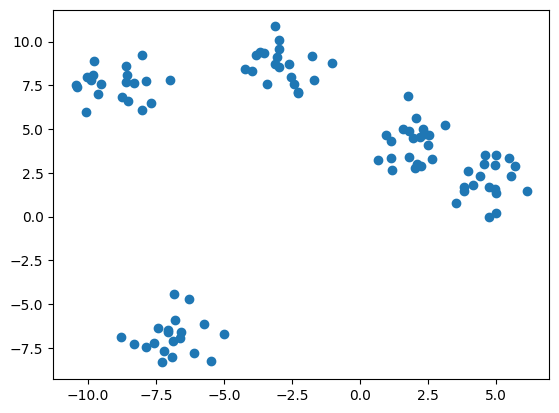

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# X will be our "input data to cluster"
X, y = datasets.make_blobs(n_samples=100, centers=5, n_features=2, random_state=42)


plt.scatter(X[:, 0], X[:, 1]) # scatter plot of the x,y values


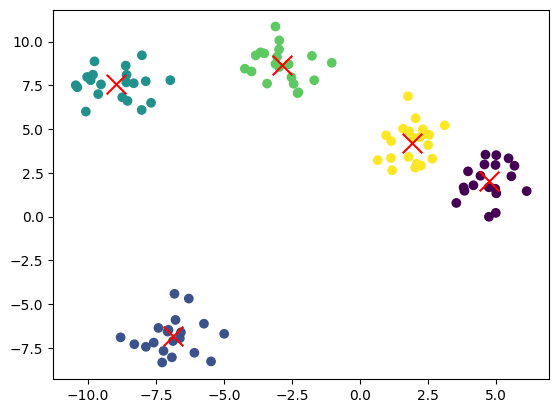

In [ ]:
k = 5 # this will be number of clusters

# X = np.append(X, [[30, 30]], axis=0)

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X) # this runs the K means algorithm

labels = kmeans.labels_ # to get different colors for different clusters
centroids = kmeans.cluster_centers_ # centroids that define the cluster region


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis') # plot the data with Kmeans labels, viridis is a color scheme for mapping
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red') # plot centroids
plt.show()